## Anora

In [12]:
import praw
from textblob import TextBlob
import requests
import matplotlib.pyplot as plt

# Setup Reddit API
reddit = praw.Reddit(client_id='hjMmaMBWEfSBtoixAZf_hg',
                     client_secret='RcO9MrDzq3H-bc1FR3KizlNN1mvFnQ',
                     user_agent='my_reddit_script_jpherson')

# Fetch Reddit post comments from the given thread URL
url = 'https://www.reddit.com/r/movies/comments/1ggv4yg/official_discussion_anora_spoilers/'
submission = reddit.submission(url=url)


# Function to analyze sentiment
def analyze_sentiment(text):
    blob = TextBlob(text)
    sentiment = blob.sentiment.polarity
    return sentiment



### Analyze the Sentiment

In [9]:
# Fetch comments and perform sentiment analysis
submission.comments.replace_more(limit=None)
comments = submission.comments.list()
positive_comments = []
negative_comments = []
neutral_comments = []

for comment in comments:
    comment_body = comment.body
    #print(comment_body)
    sentiment_score = analyze_sentiment(comment_body)
    
    # Categorize based on sentiment score
    if sentiment_score > 0:
        positive_comments.append(comment_body)
    elif sentiment_score < 0:
        negative_comments.append(comment_body)
    else:
        neutral_comments.append(comment_body)



### Output the results

Positive Comments: 1100
Negative Comments: 331
Neutral Comments: 298


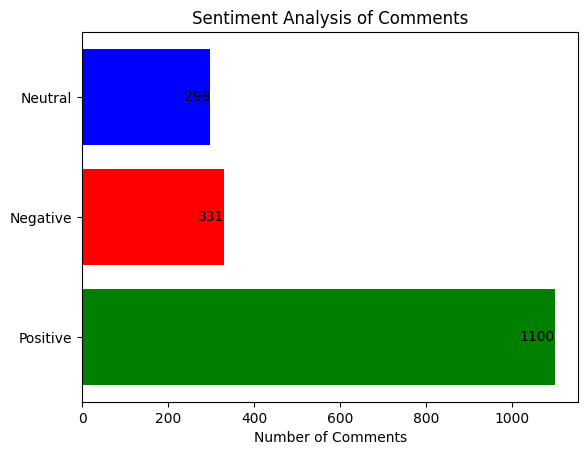

In [13]:
# Output results
print(f"Positive Comments: {len(positive_comments)}")
print(f"Negative Comments: {len(negative_comments)}")
print(f"Neutral Comments: {len(neutral_comments)}")

positive_count = len(positive_comments)
negative_count = len(negative_comments)
neutral_count = len(neutral_comments)

categories = ['Positive', 'Negative', 'Neutral']
counts = [positive_count, negative_count, neutral_count]

fig, ax = plt.subplots()

bars = ax.barh(categories, counts, color=['green', 'red', 'blue'])

# Add data labels
for bar in bars:
    width = bar.get_width()
    label_x_pos = width - 0.1 if width > 0 else width + 0.1
    ax.text(label_x_pos, bar.get_y() + bar.get_height()/2, f'{width}', va='center', ha='right' if width > 0 else 'left')

ax.set_xlabel('Number of Comments')
ax.set_title('Did Reddit like Anora?')

plt.show()

## The Brutalist

In [14]:
import praw
from textblob import TextBlob
import requests
import matplotlib.pyplot as plt

# Setup Reddit API
reddit = praw.Reddit(client_id='hjMmaMBWEfSBtoixAZf_hg',
                     client_secret='RcO9MrDzq3H-bc1FR3KizlNN1mvFnQ',
                     user_agent='my_reddit_script_jpherson')

# Fetch Reddit post comments from the given thread URL
url = 'https://www.reddit.com/r/movies/comments/1i37yra/official_discussion_the_brutalist_spoilers/'
submission = reddit.submission(url=url)


# Function to analyze sentiment
def analyze_sentiment(text):
    blob = TextBlob(text)
    sentiment = blob.sentiment.polarity
    return sentiment

### Analyze the Sentiment

In [15]:
# Fetch comments and perform sentiment analysis
submission.comments.replace_more(limit=None)
comments = submission.comments.list()
positive_comments = []
negative_comments = []
neutral_comments = []

for comment in comments:
    comment_body = comment.body
    #print(comment_body)
    sentiment_score = analyze_sentiment(comment_body)
    
    # Categorize based on sentiment score
    if sentiment_score > 0:
        positive_comments.append(comment_body)
    elif sentiment_score < 0:
        negative_comments.append(comment_body)
    else:
        neutral_comments.append(comment_body)

### Output the results

Positive Comments: 535
Negative Comments: 130
Neutral Comments: 152


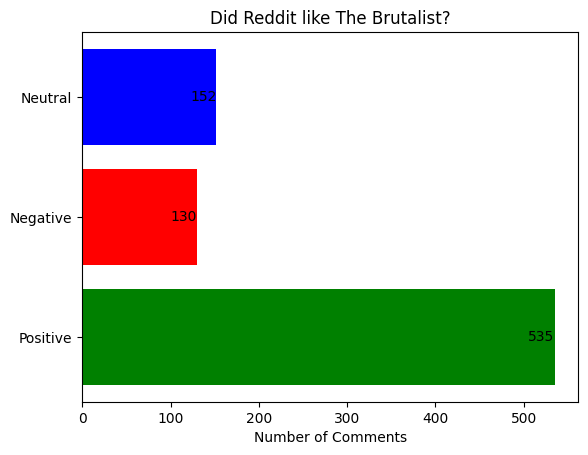

In [16]:
# Output results
print(f"Positive Comments: {len(positive_comments)}")
print(f"Negative Comments: {len(negative_comments)}")
print(f"Neutral Comments: {len(neutral_comments)}")

positive_count = len(positive_comments)
negative_count = len(negative_comments)
neutral_count = len(neutral_comments)

categories = ['Positive', 'Negative', 'Neutral']
counts = [positive_count, negative_count, neutral_count]

fig, ax = plt.subplots()

bars = ax.barh(categories, counts, color=['green', 'red', 'blue'])

# Add data labels
for bar in bars:
    width = bar.get_width()
    label_x_pos = width - 0.1 if width > 0 else width + 0.1
    ax.text(label_x_pos, bar.get_y() + bar.get_height()/2, f'{width}', va='center', ha='right' if width > 0 else 'left')

ax.set_xlabel('Number of Comments')
ax.set_title('Did Reddit like The Brutalist?')

plt.show()

## A complete unknown

In [17]:
import praw
from textblob import TextBlob
import requests
import matplotlib.pyplot as plt

# Setup Reddit API
reddit = praw.Reddit(client_id='hjMmaMBWEfSBtoixAZf_hg',
                     client_secret='RcO9MrDzq3H-bc1FR3KizlNN1mvFnQ',
                     user_agent='my_reddit_script_jpherson')

# Fetch Reddit post comments from the given thread URL
url = 'https://www.reddit.com/r/movies/comments/1hlsi27/official_discussion_a_complete_unknown_spoilers/'
submission = reddit.submission(url=url)


# Function to analyze sentiment
def analyze_sentiment(text):
    blob = TextBlob(text)
    sentiment = blob.sentiment.polarity
    return sentiment

### Analyze the Sentiment

In [18]:
# Fetch comments and perform sentiment analysis
submission.comments.replace_more(limit=None)
comments = submission.comments.list()
positive_comments = []
negative_comments = []
neutral_comments = []

for comment in comments:
    comment_body = comment.body
    #print(comment_body)
    sentiment_score = analyze_sentiment(comment_body)
    
    # Categorize based on sentiment score
    if sentiment_score > 0:
        positive_comments.append(comment_body)
    elif sentiment_score < 0:
        negative_comments.append(comment_body)
    else:
        neutral_comments.append(comment_body)

### Output the results

Positive Comments: 543
Negative Comments: 125
Neutral Comments: 173


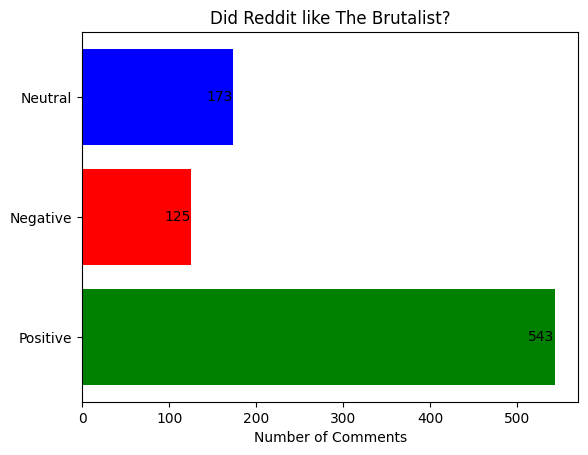

In [19]:
# Output results
print(f"Positive Comments: {len(positive_comments)}")
print(f"Negative Comments: {len(negative_comments)}")
print(f"Neutral Comments: {len(neutral_comments)}")

positive_count = len(positive_comments)
negative_count = len(negative_comments)
neutral_count = len(neutral_comments)

categories = ['Positive', 'Negative', 'Neutral']
counts = [positive_count, negative_count, neutral_count]

fig, ax = plt.subplots()

bars = ax.barh(categories, counts, color=['green', 'red', 'blue'])

# Add data labels
for bar in bars:
    width = bar.get_width()
    label_x_pos = width - 0.1 if width > 0 else width + 0.1
    ax.text(label_x_pos, bar.get_y() + bar.get_height()/2, f'{width}', va='center', ha='right' if width > 0 else 'left')

ax.set_xlabel('Number of Comments')
ax.set_title('Did Reddit like A Complete Unknown?')

plt.show()